In [177]:
import pandas as pd

#Importing my data as a CSV file from my computer's internal storage
houses=pd.read_csv(r"C:\Users\FAIRWEATHER\Downloads\housesalesprediction (1)\kc_house_data.csv")

houses.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1230000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [391]:
#optimization 
#I will use backward elimination
#I will choose the combination of variables that maximize the coefficient of determination 
#This will be done by choosing the variables from the colinear ones by picking just one from each pair
predictors_now = ['bathrooms','sqft_lot','sqft_living', 'bedrooms'] 
predictors1=[]

##The function accepts the list of predictor variables, response variables and the original coefficient of determination
def optimize(predic,responsi,r_2origi):
    newpred = []  #Creates a new list for the new predictor variables after popping the first one
    R2=[]   #Creates a new list to append the coefficient of determination variables
    maxi=0    #Sets the variable for the maximum coefficient of determination
    
    #This loops through every combination of variable in my list of predictors, finding the ones that have the greatest R**2
    for i in range(len(predic)):
        print(predic)
        #Pops the first item in the array and calls it newpred
        newpred = predic.pop(0)
        
        #This appends all the new coefficient of determinations to R2
        R2.append(multi_regressionmodel(newpred, responsi).rsquared_adj)
        print(R2)
        
        #This sets the condition for dropping a avariable that if the difference between the coefficients of determination are less that 0.2, it is dropped
        #And whether the new coefficient of determination for maxi is less than the one in R2, we drop the variable
        if (r_2origi - R2[i]) < 0.2 and R2[i]>R2[maxi]:
            maxi=i
      #This sets the condition for dropping the variable as long as there remain 2 variables in the list and the difference of R^2 is greater than 0.01  
    if(r_2origi - R2[0] > 0.01 and len(predic)>=2):
        print("popping"+ predic[maxi])
        predic.pop(predic[maxi])
        predic=optimize(predic,responsi,r_2origi)
    return predic
 
            
optimize(predictors_now, price,regression(predictors, price).rsquared_adj)   

['bathrooms', 'sqft_lot', 'sqft_living', 'bedrooms']
[0.2757322820634559]
['sqft_lot', 'sqft_living', 'bedrooms']
[0.2757322820634559, 0.008473167433510898]
['sqft_living', 'bedrooms']
[0.2757322820634559, 0.008473167433510898, 0.4928419200182209]
['bedrooms']
[0.2757322820634559, 0.008473167433510898, 0.4928419200182209, 0.09945261593665233]


[]

In [385]:
#Multivariate regression equation
import statsmodels.api as sm
import statsmodels.formula.api as smf

#This function takes all the predictor variables that I append to a list, and the response variable
def regression(lst, y):
    clean = houses.fillna(houses.mean())#This fills all nan values with the mean of the arrayif they exist
    X = clean[lst] #This calls the predictor variables, making sure there are no Nan values
    Y = clean["price"] #Declares the Y variable as my response variable
    #This uses the ordinary least squares function of python to get a regression model
    regressionmodel= sm.OLS(Y,X).fit()
    return regressionmodel 


#This calculates the R^2 using stats models functions
Rsquared = round(regression(predictors, ['price']).rsquared,3)
#This calculates the slope using the params function for each predictor variable
slope= round(regression(predictors, ['price']).params,3)
#This calculates the y-intercept using the regresion parameters
intercept = round(regression(predictors, ['price']).params[0],3)

#These are the predictor variables that were chosen by the optimization function above
predictors = ['sqft_living', 'bedrooms'] 

regression(predictors, ['price'])
print("Regression equation:","y=","intercept",slope)


Regression equation: y= intercept sqft_living      317.835
bedrooms      -37681.011
dtype: float64


In [373]:
#selfawareness

#This is a summary that I will use tocheck my answers with those of the statsmodel.
#This calls the regresion function above and creates summary statistics for the predictors and price variables.
regression(predictors,["price"]).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                 1.116e+04
Date:                Sun, 02 Feb 2020   Prob (F-statistic):               0.00
Time:                        13:15:22   Log-Likelihood:            -2.9995e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21610   BIC:                         5.999e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.988e+04   6737.332     13.341      0.000    7.67e+04    1.03e+05
sqft_living   317.1258      2.366    134.007      0.000     312.487     321.764
bedrooms    -6.211e+04   2393.795    -25.948      0.000   -6.68e+04   -5.74e+04
==============================================================================
Omnibus:                    14294.413   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           479628.244
Skew:                           2.701   Prob(JB):                         0.00
Kurtosis:                      25.437   Cond. No.                     9.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

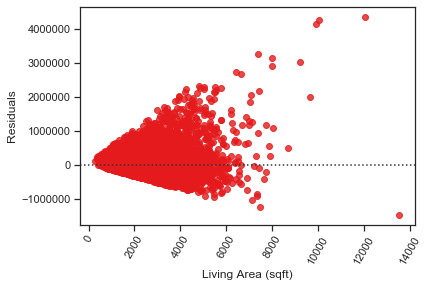

<Figure size 432x288 with 0 Axes>

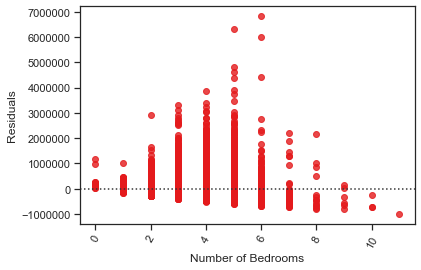

<Figure size 432x288 with 0 Axes>

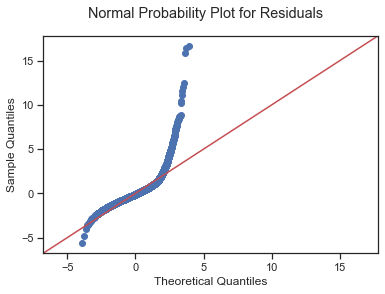

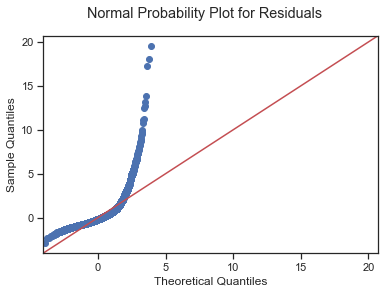

In [338]:
#Residual plots
import pylab 
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as s

predictors = ['sqft_living', 'bedrooms', 'bathrooms','sqft_lot'] #This gives the column names of my predictor variables
house=houses #This is just to conveniently call this function using house instead of the dataframe name houses

#This function takes 3 arguments, the predctor variable, the response variable and the axis name
def residuals(x,y, nom1):
    #Here I define the plots and set the size as 6 units long and 4 units tall
    fig=plt.subplots(ncols=1,sharex=True,figsize=(6,4))
    
    #This uses the statsmodels function to calculate the residuals and plot them under the house dataframe
    s.residplot(x=x, y=y, data=house)
    plt.xlabel(nom1) #This sets the x-axis name as I define it when calling the function
    plt.ylabel("Residuals")   #This sets the y-axis name as residuals
    s.set_palette("Set1") #This sets the color scheme of my plots
    plt.xticks(rotation=60) #This rotates the x-ticks by 60degrees to avoid overlapping
    plt.figure()

residuals(living,price, "Living Area (sqft)")
residuals(bed,price, "Number of Bedrooms")


#Creating the Q-Q plots for living areas to see whether they approximate a normal distribution.
#This is one of the conditions for inference, where the residuals must approximate a normal distribution.

#This function takes the predictor and response variables as I did in my regressio function above
#This allows me to get the residuals from where they were calculated above
def prob_plot(lst,y):

    #This line of code declares the variables to be plotted using the sttsmodel function, same as my regression model above
    qqplot = statsmodels.qqplot(regression(lst,y).resid,fit=True,line="45")
    #Ths\is line of code sets the title of my residual Q-Q plot
    qqplot.suptitle("Normal Probability Plot for Residuals")

    #Calling the function with the variabes that I want it to plot
prob_plot('sqft_living',"price")  
prob_plot('bedrooms',"price") 

In [210]:
import numpy as np
import math

#This code is converting the values of my columns of interest into numpy arrays. 
#This will improve my functionality to iterate through each value in the array.

price=np.array(houses["price"].values)

living=np.array(houses["sqft_living"].values)
bed=np.array(houses["bedrooms"].values)
bath=np.array(houses["bathrooms"].values)
floors=np.array(houses["floors"].values)
lot=np.array(houses['sqft_lot'].values)
above=np.array(houses['sqft_above'].values)

x_predictors=[living,bed,bath,floors,lot,above] #I have creatdthis list for instances where I would rather use the arrays than columnnames
predictors = ['sqft_living', 'bedrooms', 'bathrooms','floors','sqft_lot','sqft_above'] 

#This is the function that computes the descriptive stats for me using a combination of numpy codes and original codes
def descriptive_stats(a_list, name):
    n=len(a_list) #Here I conveniently determine n for use descriptive stats and future formulas
    mean=np.mean(a_list) #This finds the mean of every variable that I put in it using a_list
    std=np.std(a_list) #This computes the standard deviation for every variable I put in it using a_list
 
#This original code finds the range by calling the first and last elements of the sorted list variables and finding their difference
    range_sort=np.sort(a_list) #Sorting the variable list
    p1=range_sort[0] #Calling the smallest data point in the sorted array
    p2=range_sort[-1] #Calling the largest data point in the sorted array

    range_of_list=p2-p1 #Subtracting the smallest data point from teh largest data point
    

    return "Length of",name, n,"Mean of", name,mean,"Standard deviation of",name,std,"Range of",name,range_of_list
#This conveniently prints the descriptive statistic names so that I know which ones they are

#Calling the function for each of my variables
print(descriptive_stats(price, "House prices"))
print(descriptive_stats(living, "Living room area"))
print(descriptive_stats(bed, "Number of bedrooms"))
print(descriptive_stats(bath, "Number of bathrooms"))
print(descriptive_stats(lot, "Area of lot"))



('Length of', 'House prices', 21613, 'Mean of', 'House prices', 540182.1587933188, 'Standard deviation of', 'House prices', 367353.73297926004, 'Range of', 'House prices', 7625000.0)
('Length of', 'Living room area', 21613, 'Mean of', 'Living room area', 2079.8997362698374, 'Standard deviation of', 'Living room area', 918.4196493828823, 'Range of', 'Living room area', 13250)
('Length of', 'Number of bedrooms', 21613, 'Mean of', 'Number of bedrooms', 3.3694535696108825, 'Standard deviation of', 'Number of bedrooms', 0.907943253506152, 'Range of', 'Number of bedrooms', 11)
('Length of', 'Number of bathrooms', 21613, 'Mean of', 'Number of bathrooms', 2.1147573219821405, 'Standard deviation of', 'Number of bathrooms', 0.7701453398840542, 'Range of', 'Number of bathrooms', 8.0)
('Length of', 'Area of lot', 21613, 'Mean of', 'Area of lot', 15038.202285661408, 'Standard deviation of', 'Area of lot', 39909.15453305792, 'Range of', 'Area of lot', 1164274)


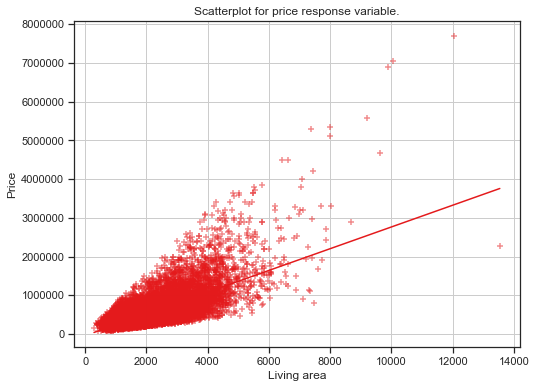

('This is the Pearsons r for:', 'Living area', (0.702043721232527, 0.0))


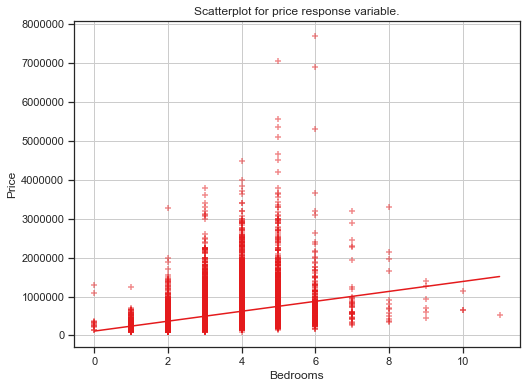

('This is the Pearsons r for:', 'Bedrooms', (0.3154271465739872, 0.0))


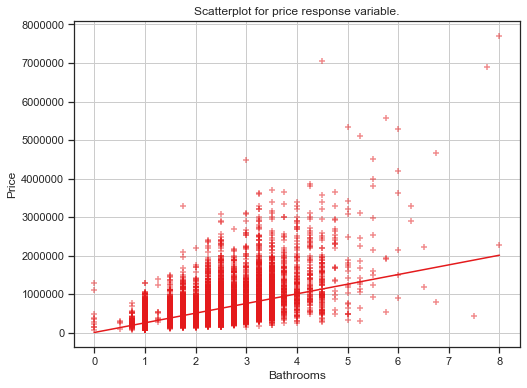

('This is the Pearsons r for:', 'Bathrooms', (0.5251340727456008, 0.0))


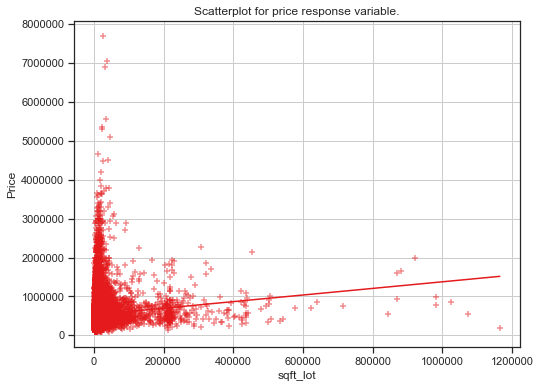

('This is the Pearsons r for:', 'sqft_lot', (0.09229867802663173, 4.1487660954695283e-42))
[(0.702043721232527, 0.0), (0.3154271465739872, 0.0), (0.5251340727456008, 0.0), (0.09229867802663173, 4.1487660954695283e-42)]


In [302]:
#This code creates scatterplots for each of my predictor variables against my response variable


pearsonrs=[]   #This is just so that I can convenienty check the Pearson's rs at the end of the function
def linear_relationship(predictor,response,predi_name):
    fig,ax = plt.subplots( figsize=(8,6 )) #Creates a plot of dimensions 8 units long and 6 units tall
    ax.scatter(predictor,response, marker="+", alpha=0.5) #Creates the scatter plot using the predictor and response variables. 
    #I set the transparency at 50% because it will better show where most of the data points are concentrated
    ax.set(xlabel = predi_name, ylabel = 'Price', title = 'Scatterplot for price response variable.') 
    #I set the axes names as well as the title. Each axis name will be updated by the argument I give it
    ax.plot(np.unique(predictor), np.poly1d(np.polyfit(predictor, price, 1))(np.unique(predictor))) 
    #This creates the regression line 
    ax.grid()   #This makes me a grid for easy viewability
    plt.show() 
    
    print(r_function(predictor, response, predi_name))
    
#This is a function that calculates the pearson's r and is called at the same time as the scatterplot function above.
#The formula in use for Pearson's r is:
                    #r=(1/n-1)*(sum of ((x-x_mean)/std of x)*(y-y_mean)/std of y)
    
    
    
    
#This function takes the same variables as the function above and returns the corresponding Pearson's r
def pearsonsr(predictor,response,predi_name):

    x_mean=np.mean(predictor)   #This sets the mean to be used to calculate the zscore of the predictors
    y_mean=np.mean(response)    #This sets the mean to be used to calculate the zscore of the response
    suma=0     #This is the sumation of the zscores for the predictors and response variables
    x_zscore=0    #This sets the zscore for the predictor that will be updated
    y_zscore=0    #This sets the zscore for the predictor that will be updated
    n=(len(x))    #This simply declares the number of times the loop iterates
    for i in range(n):  #This loop is the iteration loop that will add the sum of predictor and reponse zscores
        x_zscore=((predictor[i]-x_mean)/np.std(predictor))    #This calculates the zscore (difference between each data point and the mean/standard deviation)
        
        
        y_zscore=((response[i]-y_mean)/np.std(response))      #This calculates the zscore (difference between each data point and the mean/standard deviation)
        suma+=(x_zscore*y_zscore)   #This is a counter that sums the zscores as it iterates through the loop
    return predi_name((1/(n-1))*suma) #This Attaches the predictor name to each Pearson's r

#Calling the functions for each variable
linear_relationship(living,price,"Living area")
linear_relationship(bed,price, "Bedrooms")
linear_relationship(bath,price, "Bathrooms")
linear_relationship(lot,price, "sqft_lot")


print(pearsonrs)



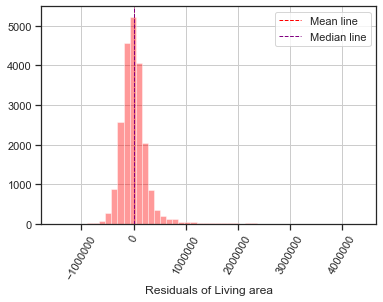

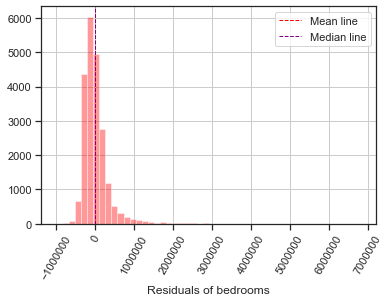

In [374]:
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels


#These are the histograms for the residuals to test for normal distribution
import statsmodels.formula.api as sm

def hist_maker(v,t,r,name_of_pred):
    #Declares the predictor variable
  
    Y = houses[t]
    hist_maker = statsmodels.OLS(Y,X).fit()
    plt.figure() #Setting the histogram figure
    #Creating the histogram of residuals using seaborn. I eliminate the curve line and make my plot red
    s.distplot(hist_maker.resid, kde=False,axlabel=name_of_pred, color='red')
    #I rotate the x-ticks for easy readability
    plt.xticks(rotation=60)
    
    #This sets the mean line and plots it as a dashed line and with a label on the legend
    plt.axvline(np.mean(r), color="red", linestyle="dashed", linewidth=1, label="Mean line") 
    #This sets the median line which is purple, named median line in the legend and one pixel thick
    plt.axvline(np.median(r), color="purple", linestyle="dashed", linewidth=1, label="Median line")
    
    #Setting the grid
    plt.grid()

    plt.legend()  #Showing the legend

    #calling the function with the variables and axes names
hist_maker("sqft_living","price",living,'Residuals of Living area')
hist_maker('bedrooms',"price",bed,"Residuals of bedrooms")


In [380]:

#These are the slopes from the regression equation
slope1=317.126 #Living room area
slope2=62113.200   #Number of bedrooms


def CI(t,standard_error):
    #I calculate the upper and lower bounds as per the formula, the t-score and standard error are called in the function
    upper_bound=slope1+(t*standard_error)
    lower_bound=slope2-(t*standard_error)
    
    return upper_bound, lower_bound

#Calling the function with the variables
print("CI for living area",CI(1.645,2.366))
print("CI for number of bedrooms",CI(1.645, 2393.795))

CI for living area (321.01806999999997, 62109.307929999995)
CI for number of bedrooms (4254.918775, 58175.407224999995)


([1.0680872262645482e-05,
  1.0559035751190777e-08,
  8.956498267976393e-09,
  6.279720808173574e-09,
  0.0004816936984939701,
  9.630161268502981e-06],)

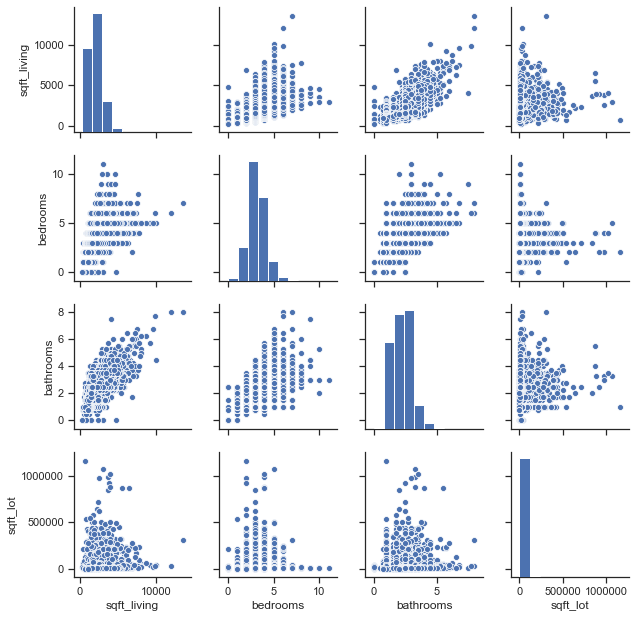

In [375]:
#Checking for multicolinearity.
#This code creates scatterplots for all the predictor variale combinations and appends their Pearson's r values to a list

#I will have to check for collinearity manually by seeing whether the variables have a strong linear relationship.
#The Pearson's r's will help me establish the threshold for strongly colinear variables.
#I will pick one of the variables from the colinear pairs that maximizes R**2.


pearsons_predictors=[0.702043721232527,0.3154271465739872,0.5251340727456008,0.25678570497551195,0.08965520771082386,0.605565506725443]
import seaborn as s
my_predictors=["sqft_living","bedrooms","bathrooms","sqft_lot",]

def colinearity(y,z):
    
    #response_var= "price"
    columnstoplot = my_predictors #Takes all the predefined predictor variables.
    s.set(style="ticks")
    
    #This is the seaborn function that plots the predictors against each other
    s.pairplot(houses[columnstoplot], x_vars=columnstoplot, y_vars=columnstoplot,height=2.2)
    
    #Calling the collinearity function with all my variables 
colinearity(my_predictors,"price")

#This is the code for calculating the standard error using the formula:
                                                        #np.sqrt((1-n)/(n-2))*(std_x/std_y)
    
#These are all the pearson's r values from the previous function
pearsons_predictors=[0.702043721232527,0.3154271465739872,0.5251340727456008,0.25678570497551195,0.08965520771082386,0.605565506725443]

#These are the variables corresponding standard deviations from the descriptive stats
pred_stds=[918.4196493828823, 0.907943253506152, 0.7701453398840542, 0.5399764027733692, 41419.55327262768, 828.071820187509]

#This sets my std_y
std_price=np.std(price)
def SE(a,b):
    for i in a:
        #As per the formula:
        standard_err=np.sqrt((1-i)/(21613-2))*(b/std_price)
        
        #Converting them into a list so that I know which values were returned against their predictors
        standard_error=list(standard_err)
    return standard_error

#Calling the function
SE(pearsons_predictors,pred_stds)






